In [ ]:
pip install  -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.24.0)


In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
data,target = load_iris(return_X_y=True, as_frame=True)
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

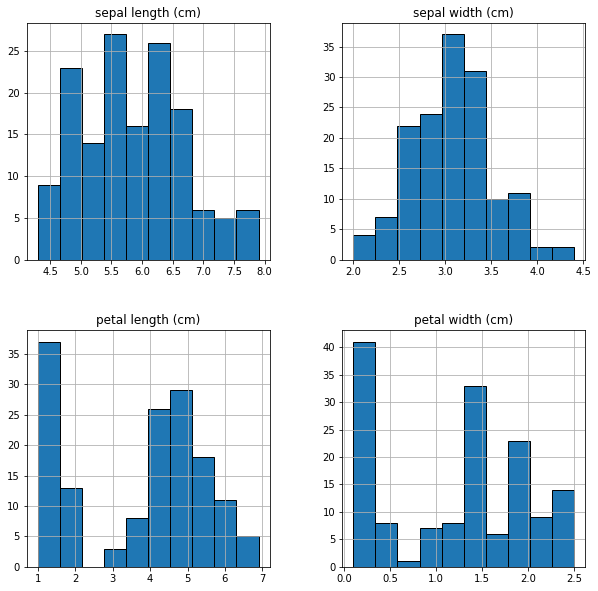

In [ ]:
data.hist(edgecolor='black',figsize=(10,10))
plt.show()

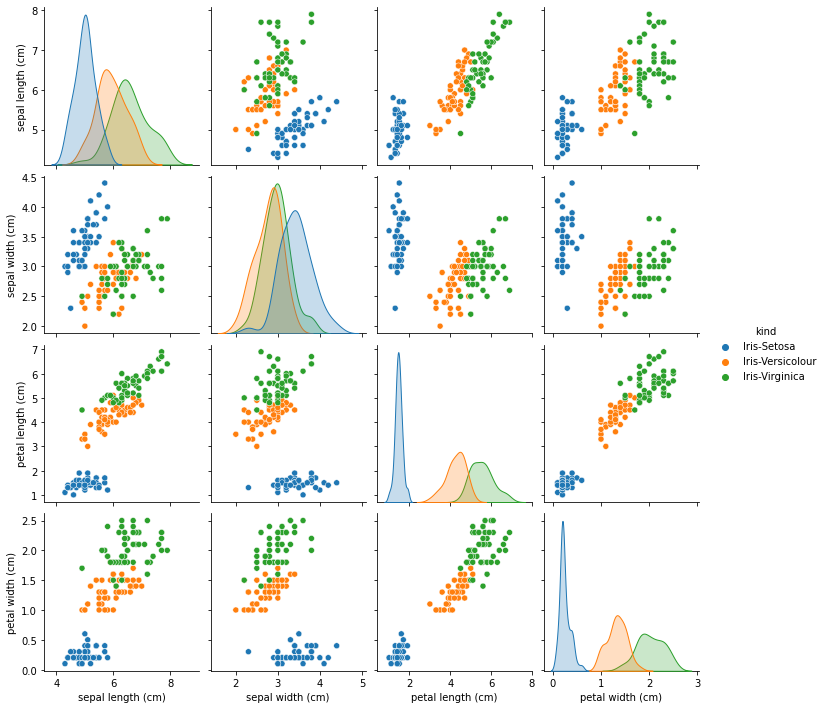

In [ ]:
data['kind']=target
data['kind']=data['kind'].replace(0, 'Iris-Setosa').replace(1, 'Iris-Versicolour').replace(2, 'Iris-Virginica')
sns.pairplot(data , hue='kind');
data=data.drop(['kind'], axis=1)

# createing random features

In [ ]:
n=10 #number of features

def sigmoid(x):
  z = 1/(1 + np.exp(-x)) 
  return z
Z={}
for i in range (n):
  r = np.random.normal(0, 1, 4) 
  z=np.sum(data*r,axis=1)
  z=sigmoid(z)  
  Z["z"+str(i+1)]=z
dataset = pd.DataFrame(Z)
dataset


,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10
0,0.535969,0.053863,0.002625,2.785430e-06,0.884261,0.948477,0.999890,0.976632,0.000992,0.167305
1,0.529106,0.067939,0.005012,6.122576e-06,0.866832,0.960336,0.999802,0.939530,0.001598,0.255016
2,0.532055,0.066923,0.004221,7.615890e-06,0.867509,0.939981,0.999775,0.967878,0.001688,0.189450
3,0.458031,0.055838,0.004554,8.478601e-06,0.894757,0.961117,0.999798,0.960979,0.001928,0.209471
4,0.521053,0.050559,0.002370,2.993335e-06,0.891424,0.942754,0.999890,0.982879,0.001016,0.143907
...,...,...,...,...,...,...,...,...,...,...
145,0.033653,0.001760,0.000102,3.107321e-09,0.999061,1.000000,1.000000,0.978808,0.000009,0.385021
146,0.034035,0.002518,0.000336,1.553362e-08,0.998530,1.000000,1.000000,0.914480,0.000034,0.538149
147,0.027958,0.001595,0.000148,5.587589e-09,0.999066,1.000000,1.000000,0.970082,0.000018,0.403621
148,0.019710,0.001053,0.000065,4.208351e-09,0.999480,1.000000,1.000000,0.994134,0.000011,0.234454


# one hot encoding

In [ ]:
iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
target=pd.get_dummies(iris.target)
target

,0.0,1.0,2.0
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


#split train and test
we consider Iris-Setosa only

In [ ]:
kinds={'Iris-Setosa':0,'Iris-Versicolour':1,'Iris-Virginica':2}
choice='Iris-Setosa'
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, target[kinds[choice]], test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 10)
(120,)
(30, 10)
(30,)


# linear regression

first guess :
 [0.60072348 0.49387777 0.49968258 0.54155362 0.41582214 0.73079521
 0.5778387  0.23953409 0.59936851 0.54283545 0.48991485]
best cost:
  0.07393811056012142
best estimation:
 


,alpha
0,0.491902
1,0.491902
2,0.500223
3,0.541355
4,0.415822
5,0.105038
6,-0.046542
7,-0.382329
8,0.028308
9,0.542839


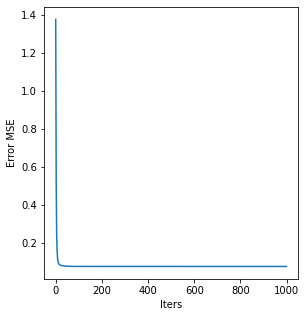

In [ ]:
#Y = M*X + M[0]
parameters=data.columns
X=x_train.to_numpy()
Y=y_train.to_numpy()
def error(yhat,y):
  # mse alpha is not array
  return ((yhat - Y)**2).mean()/2

def grad(alpha,features, x, y,w0, w):
  W=[]
  y_hat = np.sum(x*w,axis=1)+w0
  w0 = w[0] - alpha *  np.mean(y_hat- y)
  for f in range(features):
    W.append( w[f] - alpha * np.mean((y_hat - y) * x.to_numpy()[:,f]))
  return w0,np.array(W)

iters = 1000  
first_step_size=0.07
traces={}
fig ,features= plt.figure(figsize=(10,5)),len(dataset.columns)
def gradient_descent(first_step_size, x, y, w_initial,w0, iters=100):
  features=len(x.columns)
  print("first guess :\n",np.append(w0,w_initial))
  step_size = first_step_size
  trace = [np.append(w0,w_initial)]
  alpha=w_initial
  js=[]
  for i in range(iters):
    w0,alpha = grad(step_size,features,x,y,w0,alpha)
    cost = error(np.sum(x*alpha,axis=1)+w0, y)
    js.append(cost)
    trace.append(np.append(w0,alpha))
    step_size = step_size * 0.95
    
  ax=fig.add_subplot(int("1"+str(2)+str(1)))
  ax.plot(np.arange(iters), np.array(js))
  ax.set_xlabel('Iters')
  ax.set_ylabel("Error MSE")
  return trace[-1],js[-1]

traces,costs=gradient_descent(first_step_size, x_train, y_train,np.random.rand(features),np.random.rand(1), iters)  
fig.show()
traces=pd.DataFrame({'alpha':traces})
print('best cost:\n ',costs)
print('best estimation:\n ')
traces

coefficients 
         alpha
0   0.491902
1   0.491902
2   0.500223
3   0.541355
4   0.415822
5   0.105038
6  -0.046542
7  -0.382329
8   0.028308
9   0.542839
10  0.193680
Mean squared error:  0.03081221953781605
Coefficient of determination:  84.24375137270769


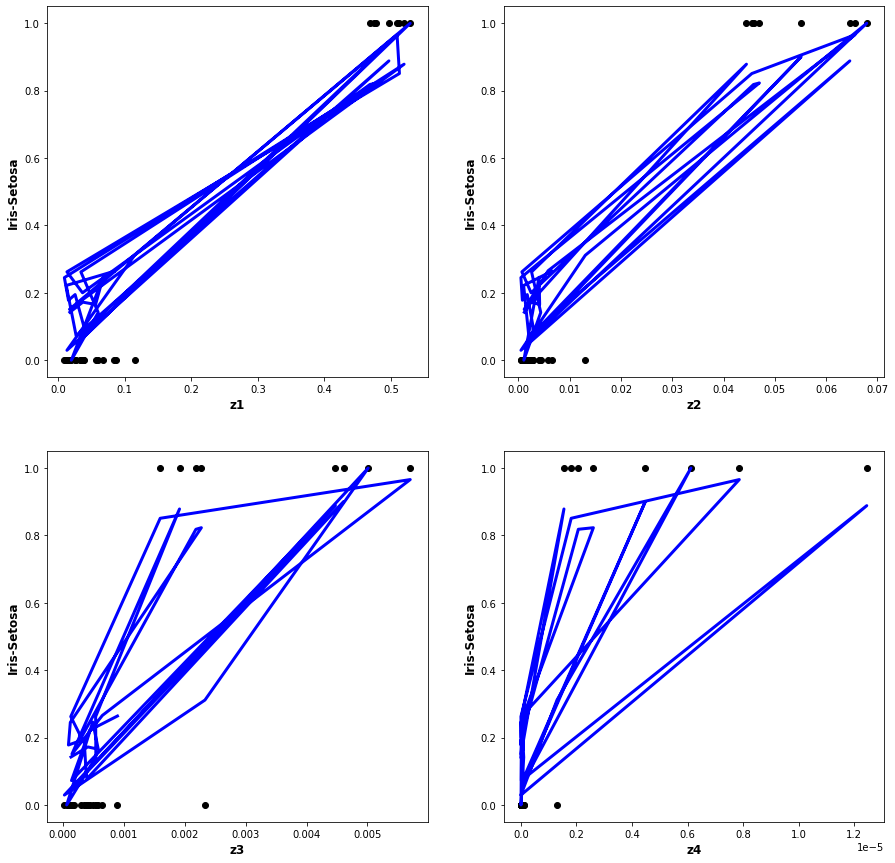

In [ ]:
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error, r2_score
b=x_test*traces.to_numpy()[1:,0]
y_pred=b.sum(axis=1)
rescale = interp1d([y_pred.to_numpy().min(),y_pred.to_numpy().max()],[0,1]) #rescale between 0 to 1
y_pred=rescale(y_pred)
# Plot outputs
fig = plt.figure(figsize=(15,15))
def mylinear(xlabel,ylabel,num):

    ax=fig.add_subplot(int("22"+str(num+1)))
    plt.scatter(x_test.to_numpy()[:,num], y_test,  color='black')
    plt.plot(x_test.to_numpy()[:,num], y_pred, color='blue', linewidth=3)
    # ME=Mean squared error & Cod=Coefficient of determination 100 is perfect prediction
    ax.set_xlabel(xlabel,fontsize='large', fontweight='bold')
    ax.set_ylabel(ylabel,fontsize='large', fontweight='bold') 
    return fig, ax

fig, ax = mylinear('z1',choice,0)  
fig, ax = mylinear('z2',choice,1)
fig, ax = mylinear('z3',choice,2)  
fig, ax = mylinear('z4',choice,3)
fig.show()

print("coefficients \n ",traces)
print("Mean squared error: ",mean_squared_error(y_test, y_pred))
print("Coefficient of determination: ",r2_score(y_test, y_pred)*100)

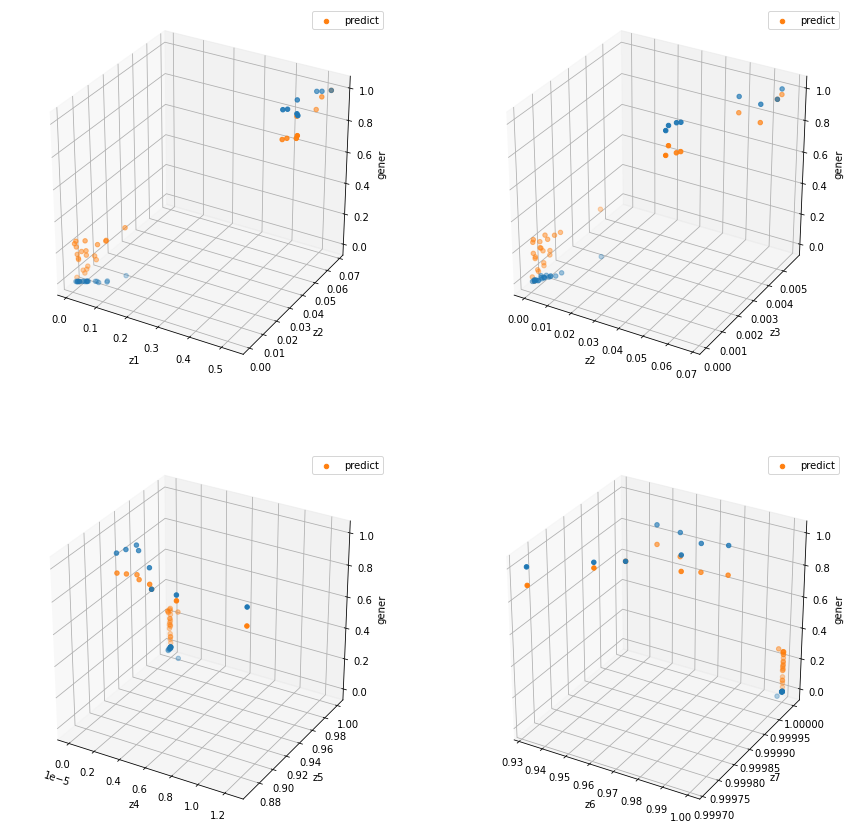

In [ ]:
fig = plt.figure(figsize=(15,15))
def draw_3d(xlabel,ylabel,num):
  ax=fig.add_subplot(int("22"+str(num)),projection='3d')
  ax.scatter(x_test[xlabel], x_test[ylabel] , y_test)
  ax.scatter(x_test[xlabel], x_test[ylabel] , y_pred,label="predict")
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_zlabel('gener')
  ax.legend()
  return fig, ax

fig, ax = draw_3d('z1',"z2",1)  
fig, ax = draw_3d('z2','z3',2)
fig, ax = draw_3d('z4','z5',3)  
fig, ax = draw_3d('z6','z7',4)
fig.show()

# LinearRegression useing sklearn

coefficients [ 3.29988979e+00 -3.03426621e+01 -9.23966409e+01 -1.26263704e+05
 -4.87500847e+00  6.92011461e+00 -7.41466853e+03 -1.95907123e-01
  4.96020148e+02 -9.20932446e-02]
Mean squared error:  0.0024382106710342582
Coefficient of determination:  98.75318772503931


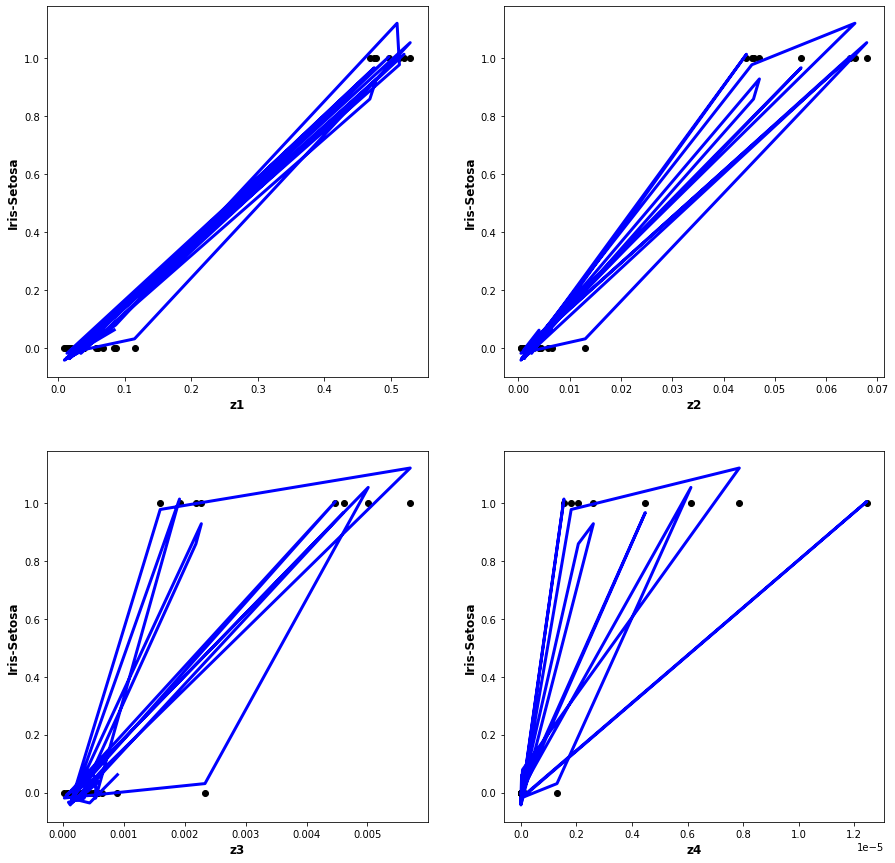

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

# Plot outputs
fig = plt.figure(figsize=(15,15))
def skilearnlinear(xlabel,ylabel,num):

    ax=fig.add_subplot(int("22"+str(num+1)))
    plt.scatter(x_test.to_numpy()[:,num], y_test,  color='black')
    plt.plot(x_test.to_numpy()[:,num], y_pred, color='blue', linewidth=3)
    # ME=Mean squared error & Cod=Coefficient of determination 100 is perfect prediction
    ax.set_xlabel(xlabel,fontsize='large', fontweight='bold')
    ax.set_ylabel(ylabel,fontsize='large', fontweight='bold') 
    return fig, ax

fig, ax = skilearnlinear('z1',choice,0)  
fig, ax = skilearnlinear('z2',choice,1)
fig, ax = skilearnlinear('z3',choice,2)  
fig, ax = skilearnlinear('z4',choice,3)
fig.show()
print("coefficients "+str(regr.coef_))
print("Mean squared error: ",mean_squared_error(y_test, y_pred))
print("Coefficient of determination: ",r2_score(y_test, y_pred)*100)

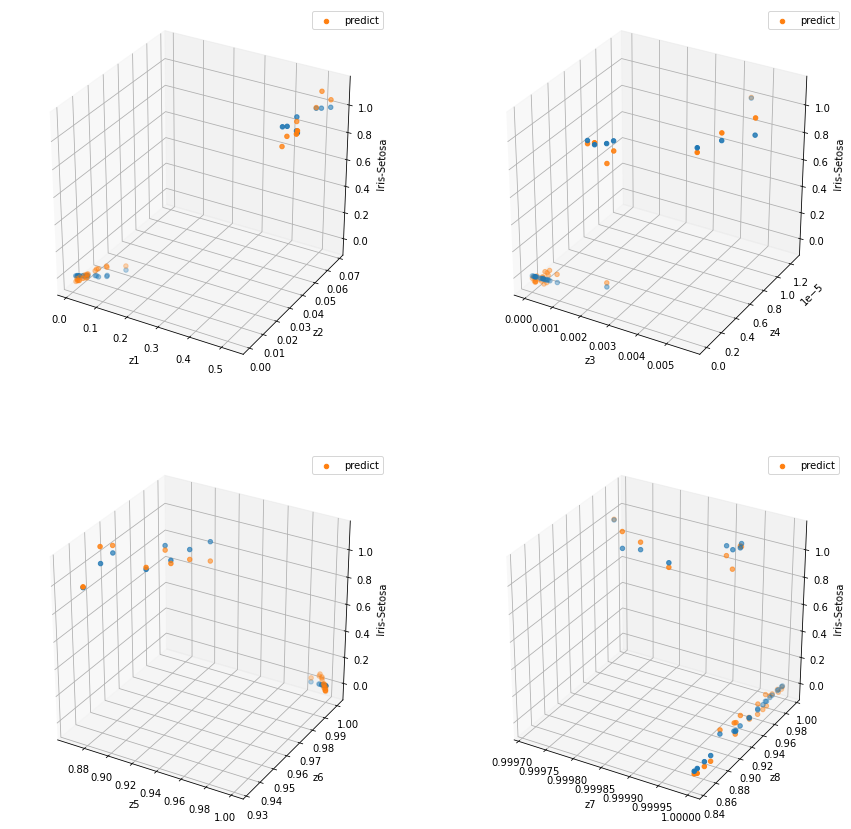

In [ ]:
fig = plt.figure(figsize=(15,15))
def draw_3d(xlabel,ylabel,num):
  ax=fig.add_subplot(int("22"+str(num)),projection='3d')
  ax.scatter(x_test[xlabel], x_test[ylabel] , y_test)
  ax.scatter(x_test[xlabel], x_test[ylabel] , y_pred,label="predict")
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_zlabel(choice)
  ax.legend()
  return fig, ax

fig, ax = draw_3d('z1',"z2",1)  
fig, ax = draw_3d('z3',"z4",2)
fig, ax = draw_3d('z5',"z6",3)  
fig, ax = draw_3d('z7',"z8",4)
fig.show()

# logestic regression

LogisticRegression accuracy for train datas: 47.5
LogisticRegression accuracy  for test datas: 0.0


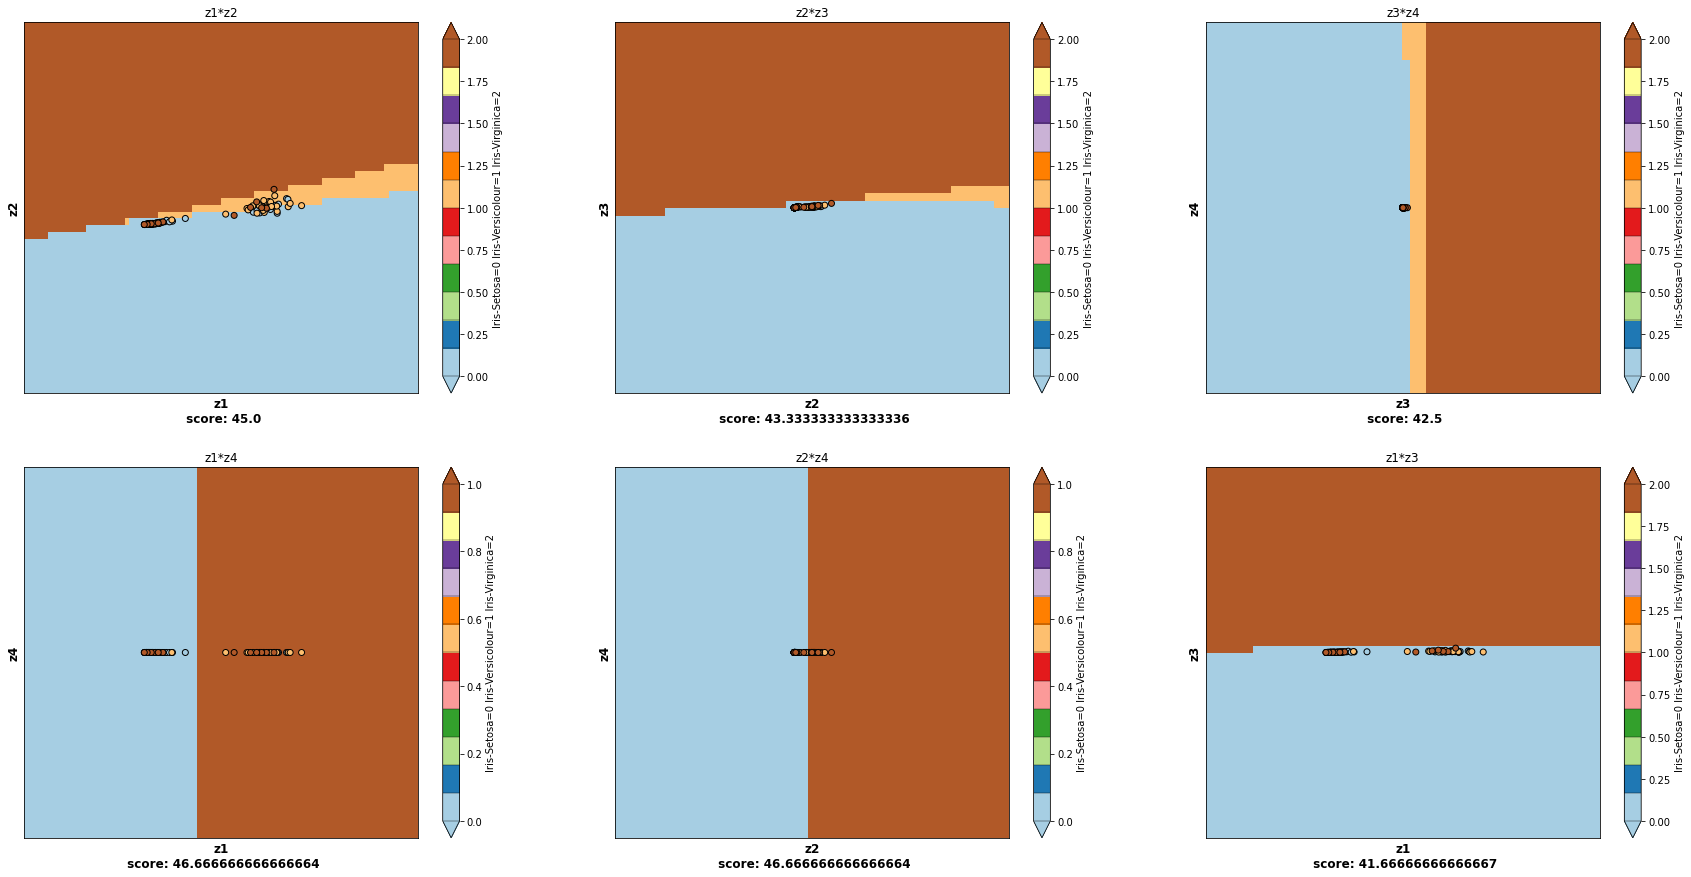

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics,preprocessing
fig = plt.figure(figsize=(30,15))
counter=1
def logestic(fc,lc,counter):
  feutures=x_train.columns
  X = x_train.to_numpy()[:, [fc, lc]]
  Y = iris.target[:120]
  # Create an instance of Logistic Regression Classifier and fit the data.
  logreg = LogisticRegression(C=1e5)
  logreg.fit(X, Y)

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  h = .02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  #plt.figure(1, figsize=(8, 8))
  ax=fig.add_subplot(int("23"+str(counter)))
  im=ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
  fig.colorbar(im, ax=ax,label='Iris-Setosa=0 '+'Iris-Versicolour=1 '+'Iris-Virginica=2',drawedges=True,extend='both')
  counter+=1

  # Plot also the training points
  ax.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k',cmap=plt.cm.Paired)
  plt.xlabel(feutures[fc]+'\n score: '+str(logreg.score(X,Y)*100),fontsize='large', fontweight='bold')
  plt.ylabel(feutures[lc],fontsize='large', fontweight='bold')

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(str(feutures[fc])+'*'+str(feutures[lc]))
  #ax.show()
  return counter

counter=logestic(0,1,counter)
counter=logestic(1,2,counter)
counter=logestic(2,3,counter)
counter=logestic(0,3,counter)
counter=logestic(1,3,counter)
counter=logestic(0,2,counter)
fig.show()

logreg = LogisticRegression(max_iter=100)
logreg.fit(x_train, iris.target[:120])
y_pred = logreg.predict(x_test)
print("LogisticRegression accuracy for train datas:",logreg.score(x_train, iris.target[:120])*100)
print("LogisticRegression accuracy  for test datas:",logreg.score(x_test, iris.target[120:])*100)


# logestic regression

for iris-setosa

1.0
              precision    recall  f1-score   support

 iris-setosa       1.00      1.00      1.00        22
      others       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



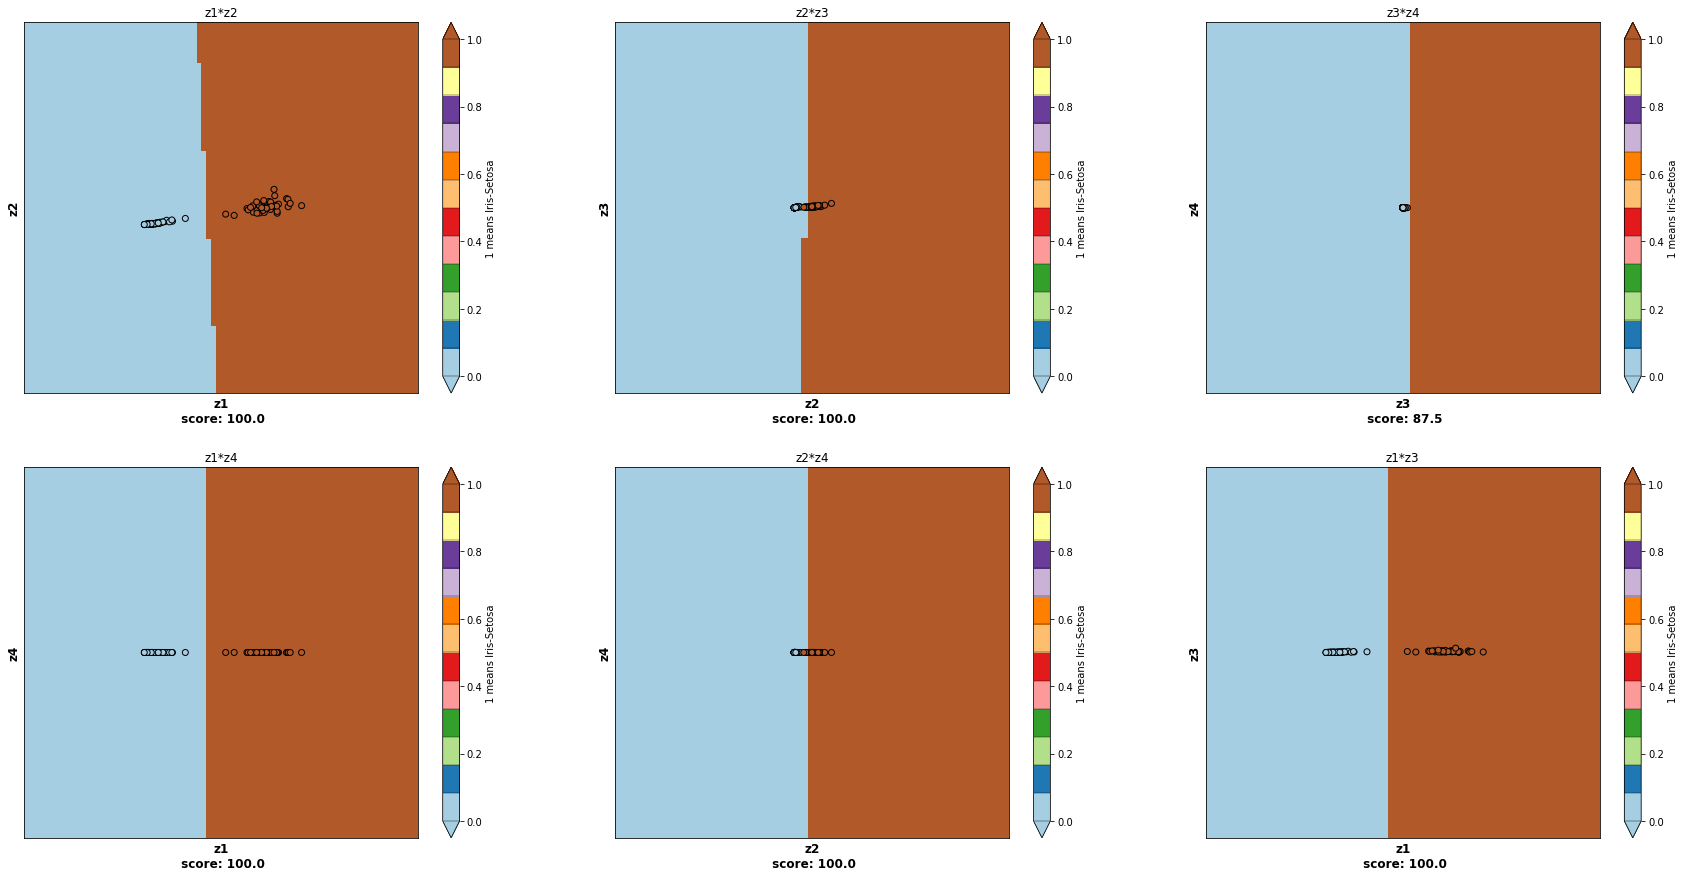

In [ ]:
fig = plt.figure(figsize=(30,15))
counter=1

def logestic(fc,lc,counter):
  feutures=x_train.columns
  X = x_train.to_numpy()[:, [fc, lc]]
  Y = y_train
  # Create an instance of Logistic Regression Classifier and fit the data.
  logreg = LogisticRegression(C=1e5)
  logreg.fit(X, Y)

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  h = .02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  #plt.figure(1, figsize=(8, 8))
  ax=fig.add_subplot(int("23"+str(counter)))
  im=ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
  fig.colorbar(im, ax=ax,label="1 means "+choice,drawedges=True,extend='both')
  counter+=1

  # Plot also the training points
  ax.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k',cmap=plt.cm.Paired)
  plt.xlabel(feutures[fc]+'\n score: '+str(logreg.score(X,Y)*100),fontsize='large', fontweight='bold')
  plt.ylabel(feutures[lc],fontsize='large', fontweight='bold')

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(str(feutures[fc])+'*'+str(feutures[lc]))
  #ax.show()
  return counter

counter=logestic(0,1,counter)
counter=logestic(1,2,counter)
counter=logestic(2,3,counter)
counter=logestic(0,3,counter)
counter=logestic(1,3,counter)
counter=logestic(0,2,counter)
fig.show()

logreg = LogisticRegression(max_iter=100)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred, target_names=list(preprocessing.LabelEncoder().fit(y_test).classes_)))
print(classification_report(y_test, y_pred, target_names=["iris-setosa","others"]))